# Mini Project 3 - K Means Clustering

* You are expected to perform K Means Clustering algorithm using the customers.csv file provided
* You are required to cluster the customers of a shop using Spending Score and Annual Income
* Hints are provided at the cells below that may help you with your project.
* You may try extra things given that you complete the trainings and predictions parts.

In [1]:
# import required modules and classes for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# read the csv file as a pandas dataframe
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Familiarize yourself with the dataset (Data Exploration)
# What are the features?
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [4]:
df = df.set_index("CustomerID")
print(df.head())

            Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40


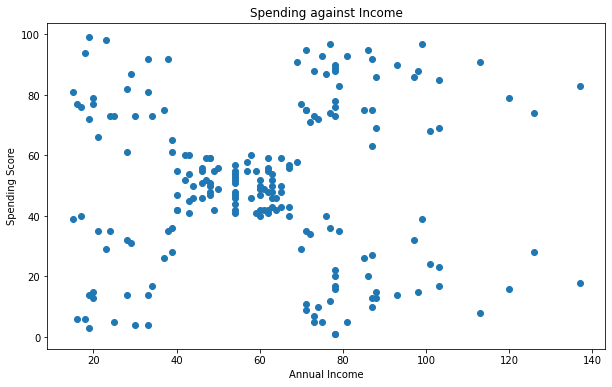

In [5]:
# Plot a scatter plot of Spending score against Annual Income
plt.figure(figsize=(10,6))
plt.scatter(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Spending against Income")
plt.show()

In [6]:
# Create a 2D array for Spending Score and Annual Income columns only.
# We will be using only the two columns for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [7]:
# Use the elbow method to find out the best value of K for K Means Clustering
k = np.arange(2, 10)
inertias = []

for i in k:
    km = KMeans(n_clusters = i, n_init = 10, init = "k-means++")
    km.fit(X)
    inertias.append(km.inertia_)

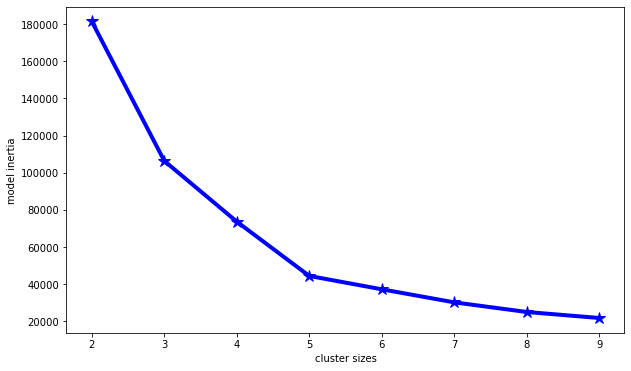

In [8]:
plt.figure(figsize=(10,6))
plt.plot(k, inertias,"*-b", linewidth=4, markersize =12)
plt.xlabel("cluster sizes")
plt.ylabel("model inertia")
plt.show()

In [9]:
# Use the optimal K value found from elbow method to perform the K Means Clustering
kms = KMeans(init = "k-means++", n_init = 10, n_clusters=5)
kms.fit(X)

KMeans(n_clusters=5)

In [11]:
# Add the Cluster information to the original dataframe
predictions = kms.predict(X)
df["cluster"] = pd.Series(predictions)
print(df.describe())

              Age  Annual Income (k$)  Spending Score (1-100)     cluster
count  200.000000          200.000000              200.000000  199.000000
mean    38.850000           60.560000               50.200000    1.788945
std     13.969007           26.264721               25.823522    1.204234
min     18.000000           15.000000                1.000000    0.000000
25%     28.750000           41.500000               34.750000    1.000000
50%     36.000000           61.500000               50.000000    1.000000
75%     49.000000           78.000000               73.000000    3.000000
max     70.000000          137.000000               99.000000    4.000000


In [12]:
x_min, x_max = min(X[:, 0]) - 1 , max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

border_predictions = kms.predict(np.c_[x_values.ravel(), y_values.ravel()])

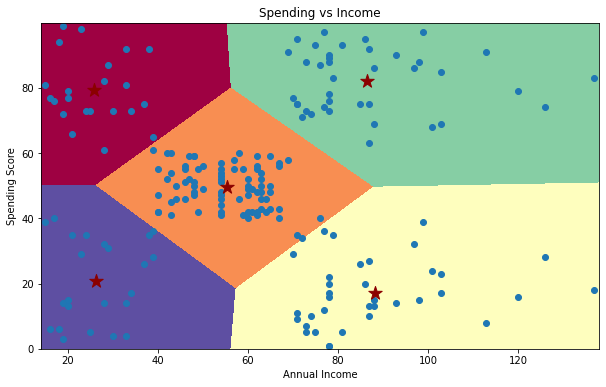

In [15]:
# Plot a scatter plot of Spending Score against Annual income with centroid information included
plt.figure(figsize=(10,6))
border_predictions = border_predictions.reshape(x_values.shape)
plt.imshow(border_predictions, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
                 cmap=plt.cm.Spectral, aspect='auto', origin='lower') 
 

plt.scatter(X[:, 0], X[:, 1], marker="o")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Spending vs Income")
centroids = kms.cluster_centers_

plt.scatter(centroids[:,0], centroids[:,1], marker="*", color="darkred", s=200)
plt.show()
